# Exploratory Data Analysis

#### Import Libraries

In [4]:
import pandas as pd
import googlemaps

import numpy as np

import requests

import openpyxl

import matplotlib.pyplot as plt
import datetime

import seaborn as sns

#### Load Dataset

In [5]:
# Load the Excel file into a pandas DataFrame
df = pd.read_excel('../data/temp/for_eda.xlsx')
df.head()

,id,id_telp,email,tanggal,jenis_pesanan,datetime_tugas,lokasi_jemput,lat_jemput,long_jemput,lokasi_tujuan,lat_tujuan,long_tujuan,datetime_selesai,jarak,pendapatan_bersih,poin_tambahan,jenis_pembayaran,jarak_jemput_tujuan,perbedaan_jarak
0,16029,8.132182e+10,purwaramadhika@gmail.com,2023-05-04 00:00:00,Mart,2023-05-04 05:06:00,"komp gading tutuka 2 blok k8 no 8, Cingcin, Ke...",-7.021726,107.505362,"Jl. Gading Tutuka 2 No.42, Ciluncat, Kec. Cang...",-7.043931,107.540715,2023-05-04 05:31:00,2.50,8800,100.0,Dompet + Tunai,7.490,4.990
1,27243,NaN,deerah60@gmail.com,2023-05-08 00:00:00,Food,2023-05-08 11:23:00,Jl. Dakota 28 Sukaraja Cicendo Bandung,-6.894789,107.569360,"No.154. Jalan Papajaran, Husen Sastranegara",-6.904878,107.579212,2023-05-08 11:51:00,1.89,7200,150.0,Dompet,6.880,4.990
2,14783,8.129765e+10,mrayfan17@gmail.com,2023-05-11 00:00:00,Food,2023-05-11 19:06:00,"Jl. Terusan Jakarta No.6, Babakan Surabaya, Ke...",-6.913613,107.645752,"Jl. Soekarno Hatta, Babakan Penghulu, Bandung ...",-6.937207,107.690535,2023-05-11 19:26:00,4.71,12000,150.0,Tunai,9.698,4.988
3,26411,NaN,daddykurniadi4647@gmail.com,2023-05-02 00:00:00,Food,2023-05-02 19:24:00,GF- Outdoor JL Ciumbuleuit No 147. He...,-6.875969,107.604215,"Jl. Cipaku Indah X No.39, Ledeng, Kec...",-6.859268,107.600874,2023-05-02 19:37:00,2.36,8800,150.0,Dompet,7.347,4.987
4,16842,8.122494e+10,amrytaufikblur@gmail.com,2023-05-14 00:00:00,Ride,2023-05-14 08:00:00,"jl dipatiukur no 107, lebakgede",-6.885659,107.614298,4J4F+4GM jalan gagak dalam,-6.931904,107.627052,2023-05-14 08:09:00,1.99,8000,150.0,Dompet,6.972,4.982


In [6]:
df.shape

(27465, 19)

### Seluruh daerah (dalam dan luar kota bandung)

In [7]:
df.describe()

,id,id_telp,lat_jemput,long_jemput,lat_tujuan,long_tujuan,jarak,poin_tambahan,jarak_jemput_tujuan,perbedaan_jarak
count,27465.000000,2.138100e+04,27465.000000,27465.000000,27465.000000,27465.000000,27465.000000,27442.000000,27465.000000,27465.000000
mean,14367.875077,1.195512e+11,-6.911439,107.611908,-6.911282,107.612263,3.679451,150.428971,4.031355,0.752807
std,8324.419757,1.755102e+11,0.025311,0.028344,0.028980,0.031968,2.956629,6.421310,3.097143,0.929463
min,3.000000,8.176327e+09,-7.078504,107.458683,-7.113588,107.414890,0.000000,3.820000,0.000000,0.000000
25%,7200.000000,8.128080e+10,-6.924122,107.597129,-6.927098,107.595887,1.660000,150.000000,1.905000,0.114000
50%,14314.000000,8.212093e+10,-6.908591,107.613733,-6.908586,107.612864,2.860000,150.000000,3.324000,0.401000
75%,21469.000000,8.532031e+10,-6.894532,107.625069,-6.891800,107.628526,4.780000,150.000000,5.292000,1.004000
max,28967.000000,8.956370e+11,-6.759178,107.816603,-6.778434,107.836598,45.450000,250.000000,46.916000,4.990000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27465 entries, 0 to 27464
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   27465 non-null  int64         
 1   id_telp              21381 non-null  float64       
 2   email                26559 non-null  object        
 3   tanggal              27426 non-null  object        
 4   jenis_pesanan        27463 non-null  object        
 5   datetime_tugas       27465 non-null  datetime64[ns]
 6   lokasi_jemput        27465 non-null  object        
 7   lat_jemput           27465 non-null  float64       
 8   long_jemput          27465 non-null  float64       
 9   lokasi_tujuan        27465 non-null  object        
 10  lat_tujuan           27465 non-null  float64       
 11  long_tujuan          27465 non-null  float64       
 12  datetime_selesai     27465 non-null  datetime64[ns]
 13  jarak                27465 non-

#### Jenis Pesanan

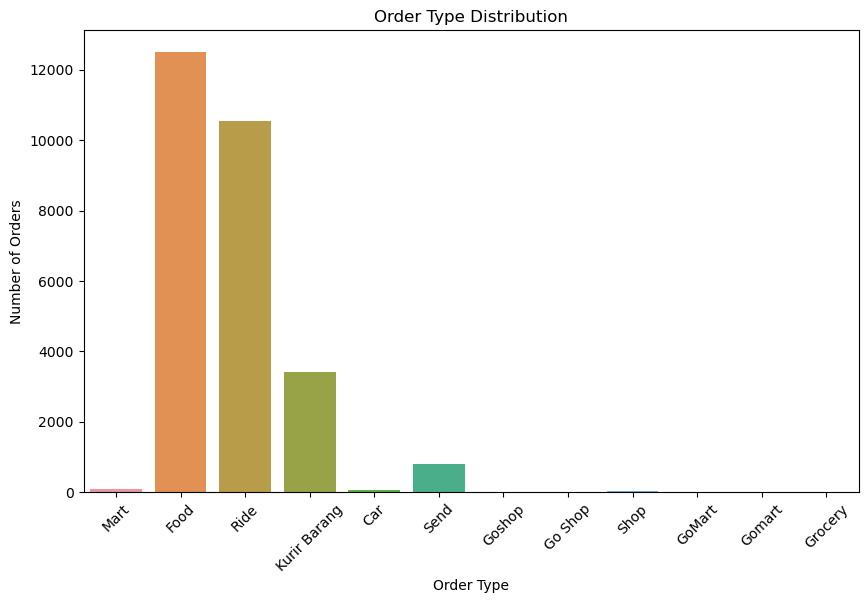

In [9]:
# Explore categorical variables like order type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='jenis_pesanan')
plt.title('Order Type Distribution')
plt.xlabel('Order Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

In [10]:
df['jenis_pesanan'].value_counts()

Food            12496
Ride            10545
Kurir Barang     3428
Send              801
Mart              102
Car                52
Shop               30
Go Shop             3
Goshop              2
Gomart              2
GoMart              1
Grocery             1
Name: jenis_pesanan, dtype: int64

Map value untuk Kurir Barang

In [11]:
# map for 'Kurir Barang'
kurir_barang_map = {
    'Send': 'Kurir Barang',
    'Mart': 'Kurir Barang',
    'Shop': 'Kurir Barang',
    'Go Shop': 'Kurir Barang',
    'Goshop': 'Kurir Barang',
    'Gomart': 'Kurir Barang',
    'GoMart': 'Kurir Barang',
    'Grocery': 'Kurir Barang'
}

In [12]:
# applying map dict
df['jenis_pesanan'] = df['jenis_pesanan'].replace(kurir_barang_map)

In [13]:
df['jenis_pesanan'].value_counts()

Food            12496
Ride            10545
Kurir Barang     4370
Car                52
Name: jenis_pesanan, dtype: int64

Hapus 'Car'

In [14]:
filtered_data = df[df['jenis_pesanan'] != 'Car']
filtered_data.shape

(27413, 19)

Export to excel (Data Transaksi v1)

In [15]:
# filtered_data.to_excel('../data/transaction/v1.xlsx', index=False)

##### Visualisasi Data Jenis Pesanan (ALL)

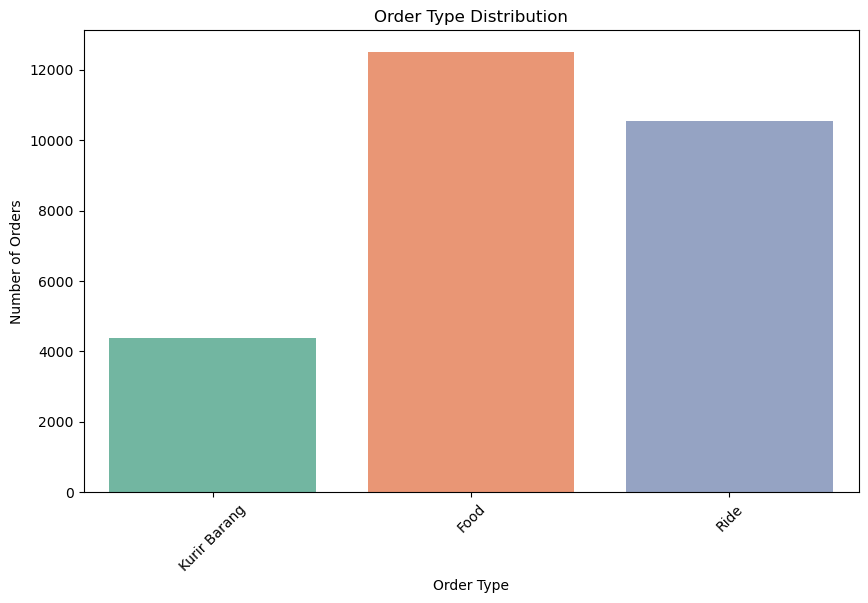

In [21]:
# Define a custom color palette
custom_palette = sns.color_palette("Set2")

# Explore categorical variables like order type
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='jenis_pesanan', palette=custom_palette)
plt.title('Order Type Distribution')
plt.xlabel('Order Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


In [29]:
filtered_data['jenis_pesanan'].value_counts()

Food            12496
Ride            10545
Kurir Barang     4370
Name: jenis_pesanan, dtype: int64

##### Pickup Dalam Bandung

Load data dalam bandung

In [19]:
# Load the Excel file into a pandas DataFrame
pickup_kota = pd.read_excel('../data/temp/pickup_kota_bandung.xlsx')
pickup_kota.head()

/home/superapp-research/anaconda3/envs/suapp/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,OBJECTID,id,id_telp,email,tanggal,jenis_pesanan,datetime_tugas,lokasi_jemput,lat_jemput,long_jemput,lokasi_tujuan,lat_tujuan,long_tujuan,datetime_selesai,jarak,pendapatan_bersih,poin_tambahan,jenis_pembayaran,jarak_jemput_tujuan,perbedaan_jarak
0,1,27243,NaN,deerah60@gmail.com,2023-05-08,Food,2023-05-08 11:23:00,Jl. Dakota 28 Sukaraja Cicendo Bandung,-6.894789,107.569360,"No.154. Jalan Papajaran, Husen Sastranegara",-6.904878,107.579212,2023-05-08 11:51:00,1.89,7200.0,150.0,Dompet,6.880,4.990
1,2,14783,8.129765e+10,mrayfan17@gmail.com,2023-05-11,Food,2023-05-11 19:06:00,"Jl. Terusan Jakarta No.6, Babakan Surabaya, Ke...",-6.913613,107.645752,"Jl. Soekarno Hatta, Babakan Penghulu, Bandung ...",-6.937207,107.690535,2023-05-11 19:26:00,4.71,12000.0,150.0,Tunai,9.698,4.988
2,3,26411,NaN,daddykurniadi4647@gmail.com,2023-05-02,Food,2023-05-02 19:24:00,GF- Outdoor JL Ciumbuleuit No 147. He...,-6.875969,107.604215,"Jl. Cipaku Indah X No.39, Ledeng, Kec...",-6.859268,107.600874,2023-05-02 19:37:00,2.36,8800.0,150.0,Dompet,7.347,4.987
3,4,16842,8.122494e+10,amrytaufikblur@gmail.com,2023-05-14,Ride,2023-05-14 08:00:00,"jl dipatiukur no 107, lebakgede",-6.885659,107.614298,4J4F+4GM jalan gagak dalam,-6.931904,107.627052,2023-05-14 08:09:00,1.99,8000.0,150.0,Dompet,6.972,4.982
4,5,12944,8.212609e+10,sandisyahroni063@gmail.com,2023-05-12,Food,2023-05-12 07:35:00,"Jl Padasuka No. 69, Pasirlayung, Cibeunying Kidul",-6.926493,107.670617,"Jl Antapani Lama no. 17, Antapani Kulon, Antapani",-6.897393,107.652105,2023-05-12 07:45:00,1.63,7200.0,150.0,Dompet,6.606,4.976


Visualisasi Data Jenis Pesanan 

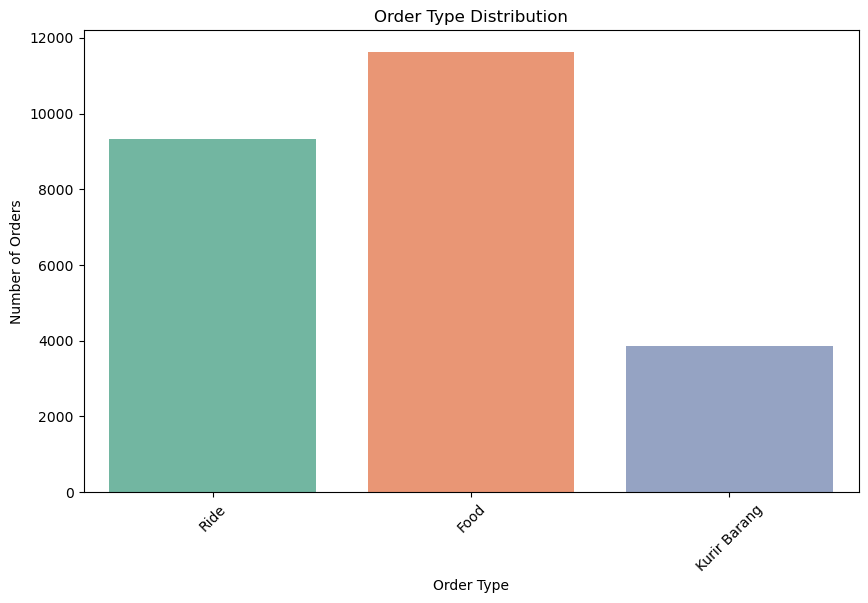

In [25]:
# Define a custom color palette
custom_palette = sns.color_palette("Set2")

# Define the order of categories
category_order = ['Ride', 'Food', 'Kurir Barang']  # Replace with your desired order


# Explore categorical variables like order type
plt.figure(figsize=(10, 6))
sns.countplot(data=pickup_kota, x='jenis_pesanan', palette=custom_palette, order=category_order)
plt.title('Order Type Distribution')
plt.xlabel('Order Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


In [26]:
pickup_kota['jenis_pesanan'].value_counts()

Food            11621
Ride             9334
Kurir Barang     3866
Name: jenis_pesanan, dtype: int64

##### Luar Bandung

Load data luar bandung

In [ ]:
# Load the Excel file into a pandas DataFrame
pickup_kota = pd.read_excel('../data/temp/pickup_luar_bandung.xlsx')
pickup_kota.head()

/home/superapp-research/anaconda3/envs/suapp/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,OBJECTID,id,id_telp,email,tanggal,jenis_pesanan,datetime_tugas,lokasi_jemput,lat_jemput,long_jemput,lokasi_tujuan,lat_tujuan,long_tujuan,datetime_selesai,jarak,pendapatan_bersih,poin_tambahan,jenis_pembayaran,jarak_jemput_tujuan,perbedaan_jarak
0,1,27243,NaN,deerah60@gmail.com,2023-05-08,Food,2023-05-08 11:23:00,Jl. Dakota 28 Sukaraja Cicendo Bandung,-6.894789,107.569360,"No.154. Jalan Papajaran, Husen Sastranegara",-6.904878,107.579212,2023-05-08 11:51:00,1.89,7200.0,150.0,Dompet,6.880,4.990
1,2,14783,8.129765e+10,mrayfan17@gmail.com,2023-05-11,Food,2023-05-11 19:06:00,"Jl. Terusan Jakarta No.6, Babakan Surabaya, Ke...",-6.913613,107.645752,"Jl. Soekarno Hatta, Babakan Penghulu, Bandung ...",-6.937207,107.690535,2023-05-11 19:26:00,4.71,12000.0,150.0,Tunai,9.698,4.988
2,3,26411,NaN,daddykurniadi4647@gmail.com,2023-05-02,Food,2023-05-02 19:24:00,GF- Outdoor JL Ciumbuleuit No 147. He...,-6.875969,107.604215,"Jl. Cipaku Indah X No.39, Ledeng, Kec...",-6.859268,107.600874,2023-05-02 19:37:00,2.36,8800.0,150.0,Dompet,7.347,4.987
3,4,16842,8.122494e+10,amrytaufikblur@gmail.com,2023-05-14,Ride,2023-05-14 08:00:00,"jl dipatiukur no 107, lebakgede",-6.885659,107.614298,4J4F+4GM jalan gagak dalam,-6.931904,107.627052,2023-05-14 08:09:00,1.99,8000.0,150.0,Dompet,6.972,4.982
4,5,12944,8.212609e+10,sandisyahroni063@gmail.com,2023-05-12,Food,2023-05-12 07:35:00,"Jl Padasuka No. 69, Pasirlayung, Cibeunying Kidul",-6.926493,107.670617,"Jl Antapani Lama no. 17, Antapani Kulon, Antapani",-6.897393,107.652105,2023-05-12 07:45:00,1.63,7200.0,150.0,Dompet,6.606,4.976


Visualisasi Data Jenis Pesanan

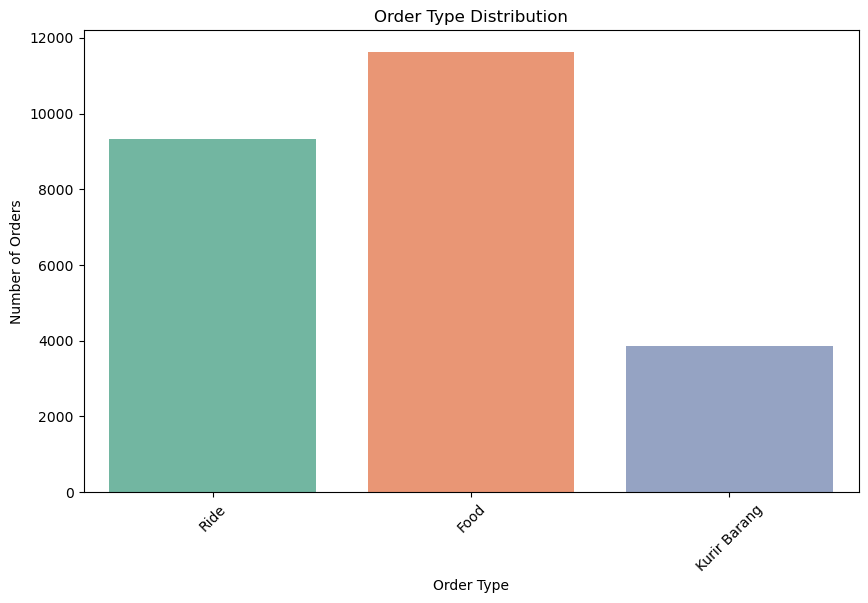

In [ ]:
# Define a custom color palette
custom_palette = sns.color_palette("Set2")

# Define the order of categories
category_order = ['Ride', 'Food', 'Kurir Barang']  # Replace with your desired order


# Explore categorical variables like order type
plt.figure(figsize=(10, 6))
sns.countplot(data=pickup_kota, x='jenis_pesanan', palette=custom_palette, order=category_order)
plt.title('Order Type Distribution')
plt.xlabel('Order Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


In [ ]:
pickup_kota['jenis_pesanan'].value_counts()

Food            11621
Ride             9334
Kurir Barang     3866
Name: jenis_pesanan, dtype: int64